In [17]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [18]:
#Load data
df = pd.read_csv("train.csv")

#**Analysing** **data**

In [19]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [20]:
# Drop columns 'Name', 'Ticket', and 'Fare'
df = df.drop(columns=["Name", "Ticket", "Fare"], axis=1)

In [21]:
# Count the number of null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Column 'Cabin' removed due to Cabin large number of null values
df = df.drop(columns=["Cabin"], axis=1)
# Replace NaN values in the "Age" column with the mean age
df["Age"].fillna(df["Age"].mean(), inplace=True)
# Replaced missing values with the most frequent value within each group
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [23]:
# Converted the "Age" column to integer
df["Age"] = df["Age"].astype(int)

#**Creating** **Plots**

In [30]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

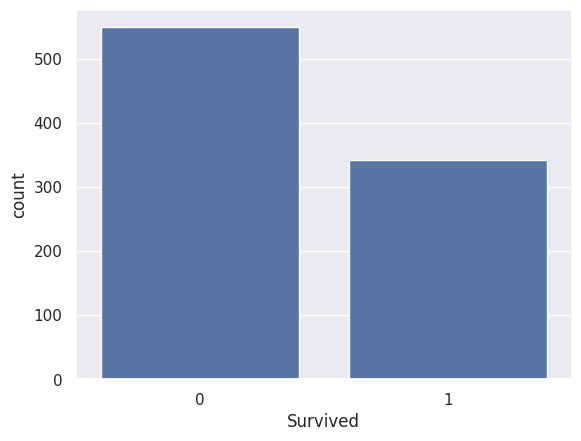

In [32]:
sns.countplot(x="Survived", data=df)

<Axes: xlabel='Pclass', ylabel='count'>

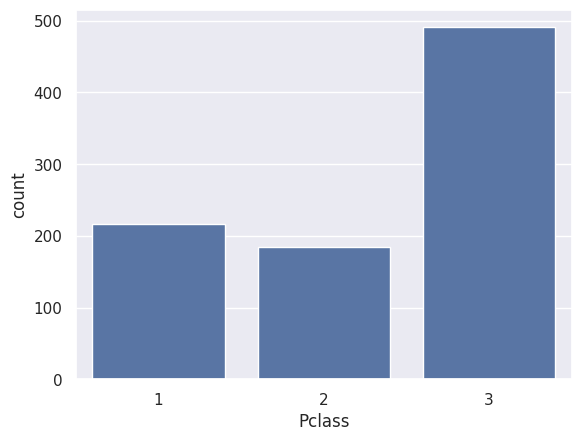

In [33]:
sns.countplot(x="Pclass", data=df)

<Axes: xlabel='Survived', ylabel='count'>

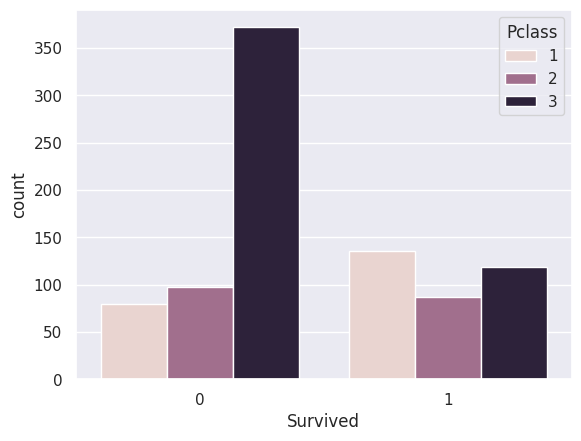

In [34]:
sns.countplot(x="Survived",hue="Pclass", data=df)

<Axes: xlabel='Sex', ylabel='count'>

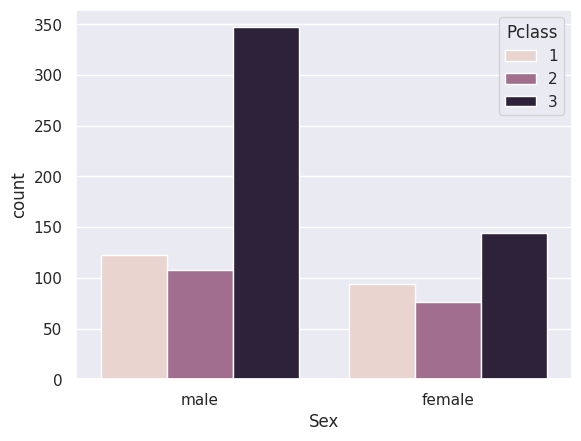

In [35]:
sns.countplot(x="Sex",hue="Pclass", data=df)

<Axes: xlabel='Sex', ylabel='count'>

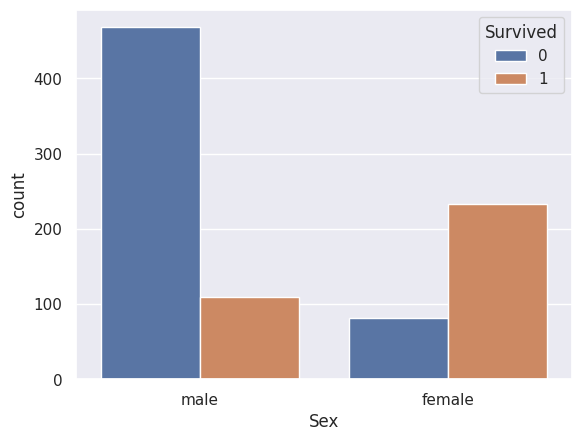

In [36]:
sns.countplot(x="Sex",hue="Survived", data=df)

In [67]:
# In this section, objects are converted to numbers.
# These transformations are performed for data processing and preparing them for machine learning.
df.replace({"Sex" :{"male":0, "female":1}, "Embarked" :{"C":0, "Q":1, "S":2}}, inplace=True)

In [38]:
df.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22,1,0,2
1,2,1,1,1,38,1,0,0
2,3,1,3,1,26,0,0,2
3,4,1,1,1,35,1,0,2
4,5,0,3,0,35,0,0,2
5,6,0,3,0,29,0,0,1
6,7,0,1,0,54,0,0,2


#**Train** **Model**

In [39]:
X = df.drop(columns = ["PassengerId","Survived"], axis=1)
Y = df["Survived"]

In [40]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.21, random_state=79)

#**KNN**

In [41]:
#import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)


In [45]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
Y_pred_knn = knn.predict(X_test)

In [47]:
#model accuracy
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
classification_report_knn = classification_report(Y_test, Y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(f"\nclassificationreport: {classification_report_knn}")

KNN Accuracy: 0.776595744680851

classificationreport:               precision    recall  f1-score   support

           0       0.78      0.89      0.83       118
           1       0.76      0.59      0.66        70

    accuracy                           0.78       188
   macro avg       0.77      0.74      0.75       188
weighted avg       0.77      0.78      0.77       188



#**Logistic Regression**

In [48]:
#import Libraries
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [51]:
Y_pred_lr = lr.predict(X_test)


In [52]:
#model accuracy
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
classification_report_lr = classification_report(Y_test, Y_pred_lr)
print(f"LogisticRegression Accuracy: {accuracy_lr}")
print(f"\nclassificationreport: {classification_report_lr}")

LogisticRegression Accuracy: 0.7925531914893617

classificationreport:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       118
           1       0.75      0.67      0.71        70

    accuracy                           0.79       188
   macro avg       0.78      0.77      0.77       188
weighted avg       0.79      0.79      0.79       188



#**SVM**

In [53]:
#import Libraries
from sklearn.svm import SVC


In [54]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [55]:
Y_pred_svm = svm.predict(X_test)

In [56]:
#model accuracy
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
classification_report_svm = classification_report(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(f"\nclassificationreport: {classification_report_svm}")

SVM Accuracy: 0.7872340425531915

classificationreport:               precision    recall  f1-score   support

           0       0.80      0.87      0.84       118
           1       0.75      0.64      0.69        70

    accuracy                           0.79       188
   macro avg       0.78      0.76      0.76       188
weighted avg       0.78      0.79      0.78       188



#**Random Forest**

In [57]:
#import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
# Define a dictionary of hyperparameters for the Random Forest model.
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'criterion': ["gini", "entropy"]
}

In [ ]:
rf_model = RandomForestClassifier()

In [60]:
# Perform a grid search to find the best combination of hyperparameters.
grid = GridSearchCV(estimator=rf_model, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, Y_train)
# The best parameters are printed after fitting the model.
print("The best parameters are:", grid.best_params_)

The best parameters are: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
Y_pred_rn = grid.predict(X_test)

In [66]:
#model accuracy
classification_report_rn = classification_report(Y_test, Y_pred_rn)
print("Model Accuracy:", accuracy_score(Y_test, Y_pred_rn))
print(f"/nclassificationreport: {classification_report_rn}")

Model Accuracy: 0.8191489361702128
/nclassificationreport:               precision    recall  f1-score   support

           0       0.80      0.94      0.87       118
           1       0.86      0.61      0.72        70

    accuracy                           0.82       188
   macro avg       0.83      0.78      0.79       188
weighted avg       0.83      0.82      0.81       188

